### Customer Segmentation (K-means Clustering)

##### 2020710058 Applied Data Science Doo-Yeong, Lee

In [1]:
# Load libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Read Raw Data
df = pd.read_csv("customers_data.csv")

In [8]:
# Check Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
# Check data columns
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [12]:
# Check the First 5 rows of the data
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
# Drop a columns which is unnecessary
df.drop(["CustomerID"], axis = 1, inplace = True)

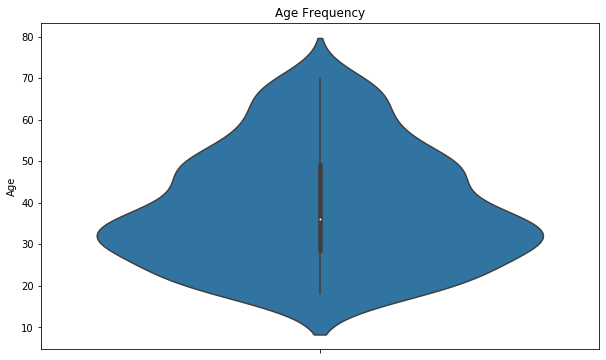

In [26]:
# Visualization (Age)
plt.figure(figsize = (10, 6))
plt.title("Age Frequency")
sns.axes_style("dark")
sns.violinplot(y=df["Age"])
plt.show()

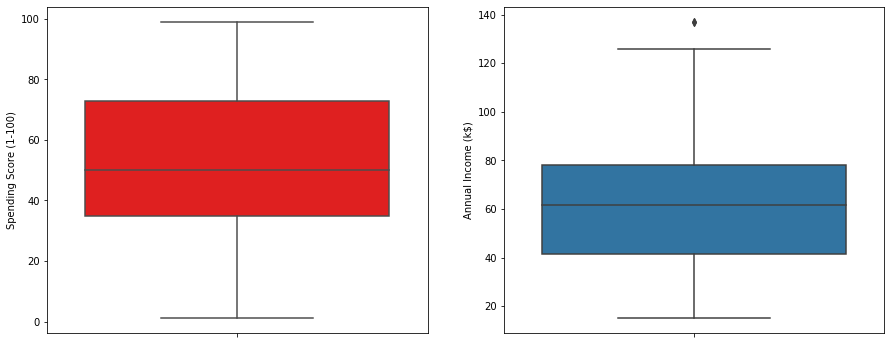

In [27]:
# Visualization (Spending Score & Annual Income)
plt.figure(figsize = (15, 6))
plt.subplot(1,2,1)
sns.boxplot(y = df["Spending Score (1-100)"], color = "red")
plt.subplot(1,2,2)
sns.boxplot(y = df["Annual Income (k$)"])
plt.show()

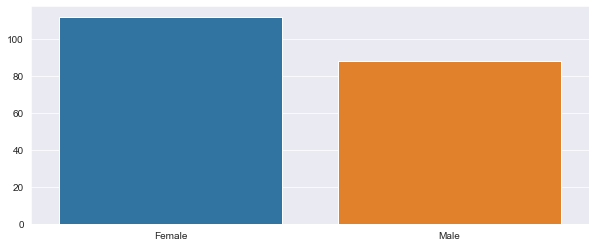

In [34]:
# Visualization (Gender)
genders = df["Gender"].value_counts()
sns.set_style("darkgrid")
plt.figure(figsize = (10,4))
sns.barplot(x= genders.index, y = genders.values)
plt.show()

Max Age: 70
Min Age: 18


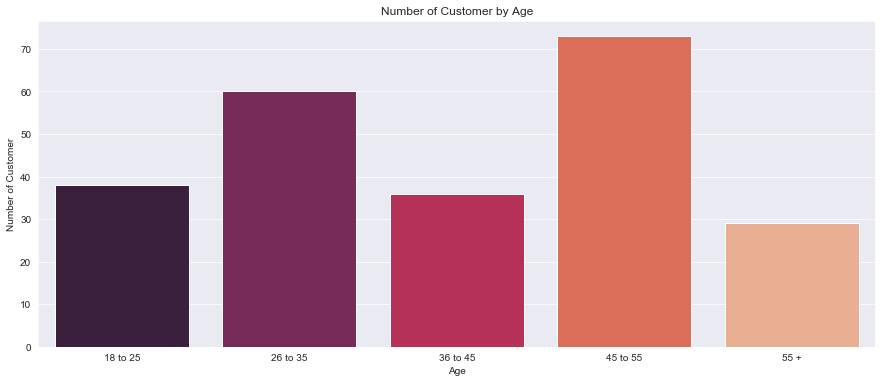

In [51]:
# Divide the data by age
print("Max Age:",max(df["Age"]))
print("Min Age:",min(df["Age"]))
age18to25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26to35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36to45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46to55 = df.Age[(df.Age <= 55) & (df.Age >= 36)]
age55above = df.Age[df.Age >= 56]

# Visulization (Number of Customer by Age)
x = ["18 to 25", "26 to 35", "36 to 45", "45 to 55", "55 +"]
y = [len(age18to25), len(age26to35), len(age36to45), len(age46to55), len(age55above)]

plt.figure(figsize = (15,6))
sns.barplot(x = x, y = y, palette = "rocket")
plt.title("Number of Customer by Age")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

Max Spending Score: 99
Min Spending Score: 1


Text(0.5, 0, 'Number of Cumstomer by Score')

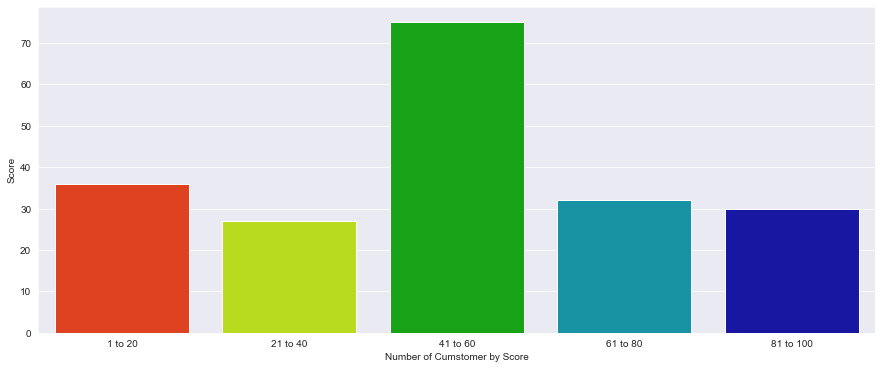

In [59]:
print("Max Spending Score:",max(df["Spending Score (1-100)"]))
print("Min Spending Score:",min(df["Spending Score (1-100)"]))
Spending1to20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
Spending21to40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
Spending41to60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
Spending61to80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
Spending81to100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

SpendingX = ["1 to 20", "21 to 40", "41 to 60", "61 to 80", "81 to 100"]
SpendingY = [len(Spending1to20.values), len(Spending21to40.values), len(Spending41to60.values), len(Spending61to80.values), len(Spending81to100.values)]

plt.figure(figsize = (15,6))
sns.barplot(x = SpendingX, y = SpendingY, palette = "nipy_spectral_r")
plt.ylabel("Score")
plt.xlabel("Number of Cumstomer by Score")

137
15


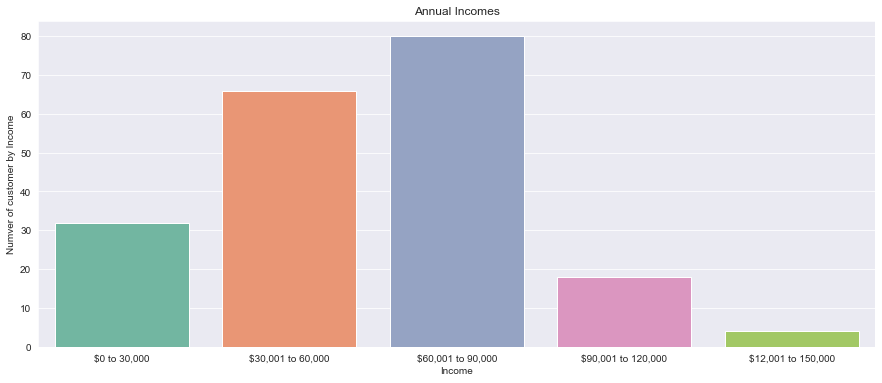

In [82]:
print(max(df["Annual Income (k$)"]))
print(min(df["Annual Income (k$)"]))
annual0to30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
annual31to60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
annual61to90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
annual91to120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
annual121to150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

annualX = ["$0 to 30,000", "$30,001 to 60,000", "$60,001 to 90,000", "$90,001 to 120,000", "$12,001 to 150,000"]
annualY = [len(annual0to30.values), len(annual31to60.values), len(annual61to90.values), len(annual91to120.values), len(annual121to150.values)]

plt.figure(figsize = (15,6))
sns.barplot(x = annualX, y = annualY, palette = "Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Numver of customer by Income")
plt.show()

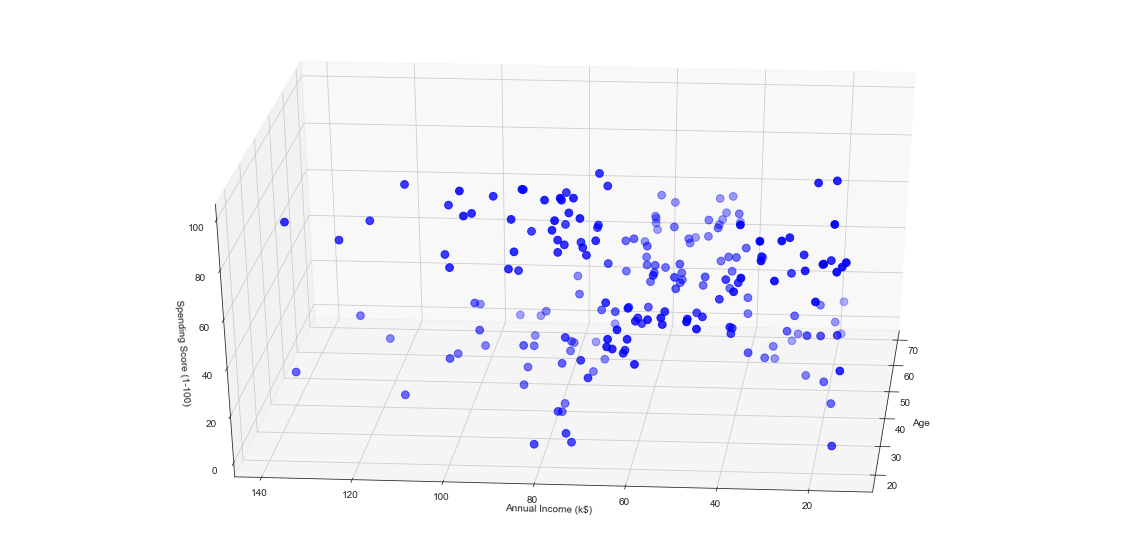

In [90]:
from mpl_toolkits.mplot3d import Axes3D

sns.set_style("white")
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df["Age"], df["Annual Income (k$)"], df["Spending Score (1-100)"], c='blue', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
plt.show()

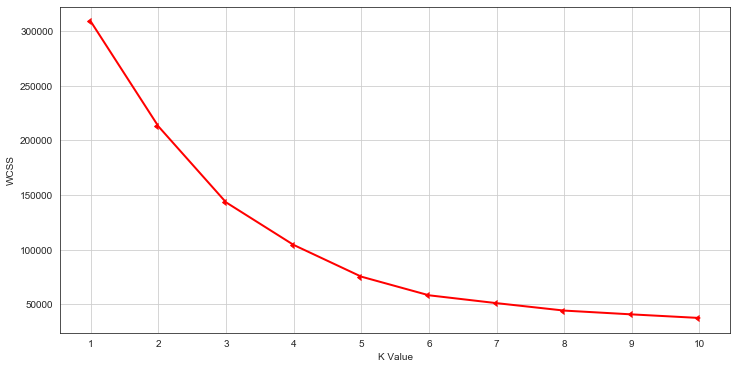

In [118]:
from sklearn.cluster import KMeans

wcss = [] # the sum of the squared distance between each member of the cluster and its centroid
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = "k-means++")
    kmeans.fit(df.iloc[:,1:]) #Age, Annual Income, Spending Score
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth = 2, color = 'red', marker = 8)
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

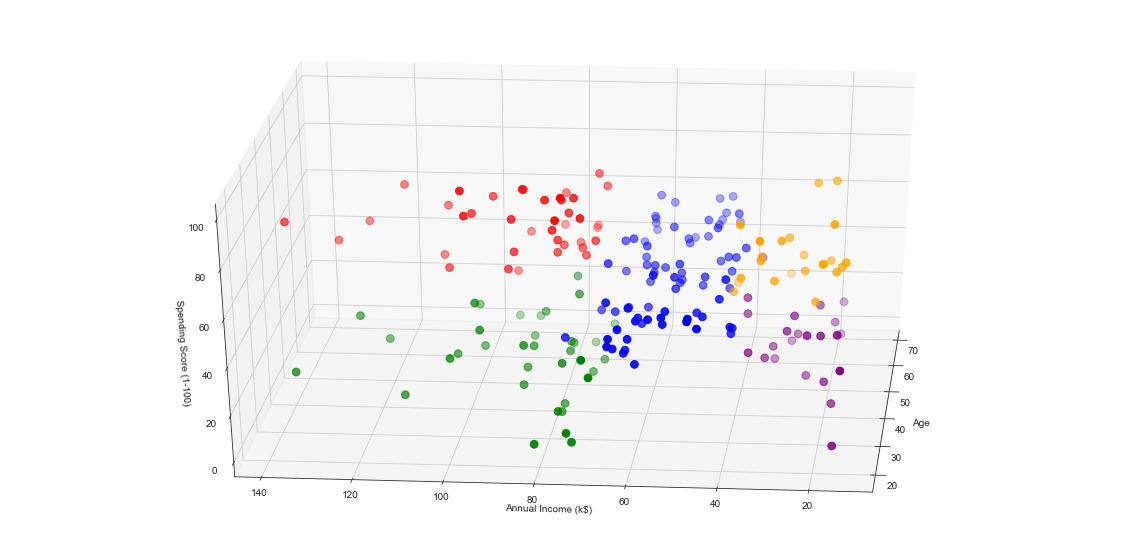

In [129]:
km = KMeans(n_clusters = 5)
clusters = km.fit_predict(df.iloc[:,1:])

df['label'] = clusters

fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
plt.show()